In [3]:
using Pkg
using LinearAlgebra
# using Plots
using Distributions
using Random
using StateSpaceDynamics
using StatsBase

const SSD = StateSpaceDynamics

StateSpaceDynamics

# Gaussian HMM

In [7]:
"""
Create an underlying GaussianHMM to generate data
"""

# Create Guassian Emission Models
output_dim = 2
μ = [0.0, 0.0]
Σ = 0.1 * Matrix{Float64}(I, output_dim, output_dim)
emission_1 = GaussianEmission(output_dim, μ, Σ)

μ = [2.0, 1.0]
Σ = 0.1 * Matrix{Float64}(I, output_dim, output_dim)
emission_2 = GaussianEmission(output_dim, μ, Σ)

# Create GaussianHMM
true_model = SSD.GaussianHMM(K=2, output_dim=2)
true_model.B[1] = emission_1
true_model.B[2] = emission_2
true_model.A = [0.9 0.1; 0.8 0.2]

# Sample from the model
n=10000
true_labels, data = SSD.sample(true_model, n=n)

# Fit a gaussian hmm to the data
test_model = SSD.GaussianHMM(K=2, output_dim=2)
test_model.A = [0.8 0.2; 0.05 0.95]
ll = SSD.fit!(test_model, data)

print(isapprox(test_model.B[1].μ, true_model.B[1].μ, atol=0.1) || isapprox(test_model.B[1].μ, true_model.B[2].μ, atol=0.1))
print(isapprox(test_model.B[2].μ, true_model.B[2].μ, atol=0.1) || isapprox(test_model.B[2].μ, true_model.B[1].μ, atol=0.1))

Running EM algorithm... 100%|██████████████| Time: 0:00:16 ( 0.17  s/it)


truetrue

In [3]:
println(test_model.A)

[0.9002838243529433 0.09971617564702769; 0.7968568254141668 0.2031431745858017]


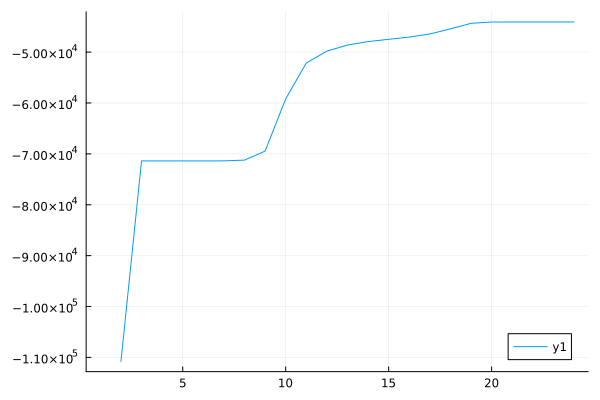

In [4]:
plot(ll)

# Switching Gaussian Regression #

In [5]:
# Create Emission Models
emission_1 = GaussianRegressionEmission(input_dim=3, output_dim=1, include_intercept=true, β=reshape([3, 2, 2, 3], :, 1))
emission_2 = GaussianRegressionEmission(input_dim=3, output_dim=1, include_intercept=true, β=reshape([-4, -2, 3, 2], :, 1))

# Create Switching Regression Model
true_model = SwitchingGaussianRegression(K=2, input_dim=3, output_dim=1, include_intercept=true)

# Plug in the emission models
true_model.B[1] = emission_1
true_model.B[2] = emission_2

# Sample from the model
n = 20000
Φ = randn(n, 3)
true_labels, data = SSD.sample(true_model, Φ, n=n)

# Try to fit a new model to the data
test_model = SSD.SwitchingGaussianRegression(K=2, input_dim=3, output_dim=1, include_intercept=true)
ll = SSD.fit!(test_model, data, Φ)

# Test output -> not quite right yet
print(isapprox(test_model.B[1].β, true_model.B[1].β, atol=0.1) || isapprox(test_model.B[1].β, true_model.B[2].β, atol=0.1))
print(isapprox(test_model.B[2].β, true_model.B[2].β, atol=0.1) || isapprox(test_model.B[2].β, true_model.B[1].β, atol=0.1))

truetrue

In [6]:
println(true_model.A)
println(test_model.A)

[0.14789034795193667 0.8521096520480632; 0.9009140515291515 0.09908594847084838]
[0.10320965742906335 0.8967903425709303; 0.8548495947664804 0.14515040523350403]


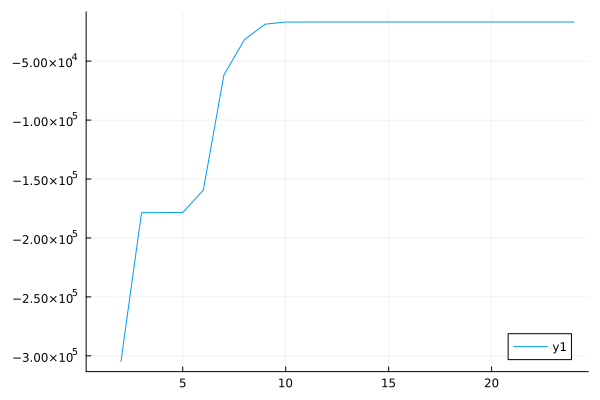

In [7]:
plot(ll)

# Switching Bernoulli Regression #

In [18]:
"""
Create Bernoulli Regression Model
"""
# Make Emission Models
emission_1 = SSD.BernoulliRegressionEmission(input_dim=2, output_dim=1, include_intercept=true, β = reshape([3, 1, 2], :, 1))
emission_2 = SSD.BernoulliRegressionEmission(input_dim=2, output_dim=1, include_intercept=true, β = reshape([-3, -2, 0.1], :, 1))

# Create Switching Bernoulli Regression and add the emissions
true_model = SSD.SwitchingBernoulliRegression(K=2, input_dim=2)
true_model.A = [0.9 0.1; 0.2 0.8]
true_model.B[1] = emission_1
true_model.B[2] = emission_2

# Sample from the model
n=40000
Φ = randn(n, 2)
true_labels, data = SSD.sample(true_model, Φ, n=n)

# Fit a new Bernoulli Regression Model to the data
test_model = SSD.SwitchingBernoulliRegression(K=2, input_dim=2, λ=1.0)
test_model.A = [0.75 0.25; 0.1 0.9]
test_model.B[1] = SSD.BernoulliRegressionEmission(input_dim=2, output_dim=1, include_intercept=true, β = reshape([2.5, 0.25, 1.0], :, 1))
test_model.B[2] = SSD.BernoulliRegressionEmission(input_dim=2, output_dim=1, include_intercept=true, β = reshape([-2.0, -3.0, -1.0], :, 1))
ll = SSD.fit!(test_model, data, Φ, max_iters=200)

# # Test it works alright
print(isapprox(test_model.B[1].β, true_model.B[1].β, atol=0.2) || isapprox(test_model.B[1].β, true_model.B[2].β, atol=0.2))
print(isapprox(test_model.B[2].β, true_model.B[2].β, atol=0.2) || isapprox(test_model.B[2].β, true_model.B[1].β, atol=0.2))

truetrue

In [50]:
 # Make Emission Models
 emission_1 = StateSpaceDynamics.BernoulliRegressionEmission(input_dim=2, output_dim=1, include_intercept=true, β = reshape([3, 1, 2], :, 1))
 emission_2 = StateSpaceDynamics.BernoulliRegressionEmission(input_dim=2, output_dim=1, include_intercept=true, β = reshape([-3, -2, 0.1], :, 1))

 # Create Switching Bernoulli Regression and add the emissions
 true_model = StateSpaceDynamics.SwitchingBernoulliRegression(K=2, input_dim=2)
 true_model.A = [0.9 0.1; 0.2 0.8]
 true_model.B[1] = emission_1
 true_model.B[2] = emission_2

 # Sample from the model
 n=20000
 Φ = randn(n, 2)
 true_labels, data = StateSpaceDynamics.sample(true_model, Φ, n=n)

 # Fit a new Bernoulli Regression Model to the data
 test_model = StateSpaceDynamics.SwitchingBernoulliRegression(K=2, input_dim=2, λ=1.0)
 test_model.A = [0.75 0.25; 0.1 0.9]
 test_model.B[1] = StateSpaceDynamics.BernoulliRegressionEmission(input_dim=2, output_dim=1, include_intercept=true, β = reshape([2.5, 0.25, 1.0], :, 1))
 test_model.B[2] = StateSpaceDynamics.BernoulliRegressionEmission(input_dim=2, output_dim=1, include_intercept=true, β = reshape([-2.0, -3.0, -1.0], :, 1))
 ll = StateSpaceDynamics.fit!(test_model, data, Φ, max_iters=200)


34-element Vector{Float64}:
    -Inf
 -12839.865356199973
 -10184.638272272261
 -10079.951768047536
 -10062.72467219119
 -10059.00350845751
 -10057.803140636708
 -10057.25261599488
 -10056.954245305173
 -10056.782675180708
      ⋮
 -10056.536315150557
 -10056.536291119392
 -10056.536276822913
 -10056.536268322483
 -10056.536263260385
 -10056.5362602488
 -10056.536258462205
 -10056.536257393143
 -10056.536256760752

In [52]:
test_model.B[2].β

3×1 Matrix{Float64}:
 -2.9678714083854545
 -1.9979667469842453
  0.09879202546365365

In [19]:
println(test_model.A)   
println(true_model.A)
println(test_model.B[1].β)
println(test_model.B[2].β)

[0.8975461072738249 0.10245389272615359; 0.20203694889648605 0.7979630511035714]
[0.9 0.1; 0.2 0.8]
[3.0412096501977746; 1.01438462171183; 2.06428643507534;;]
[-2.9866353135018286; -1.9664253294320277; 0.12919604659625322;;]


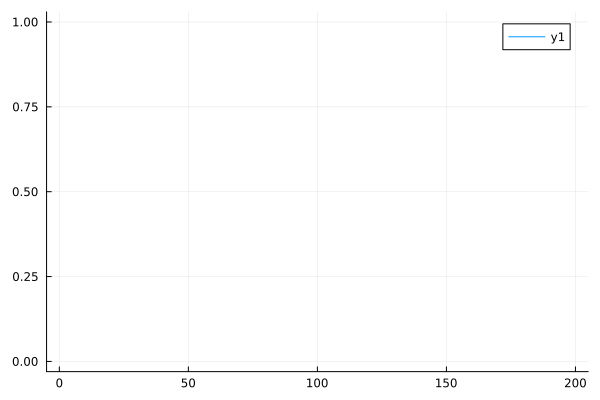

In [4]:
plot(ll[3:end])

# Switching Poisson Regression

In [37]:
"""
Create a Switching Poisson Regression
"""
# Create the emission models
emission_1 = PoissonRegressionEmission(input_dim=3, output_dim=1, include_intercept=true, β=reshape([4, 3, 2, 4], :, 1))
emission_2 = PoissonRegressionEmission(input_dim=3, output_dim=1, include_intercept=true, β=reshape([-4, -2, 1, 3], :, 1))

# Initialize the SwitchingPoissonRegression
true_model = SwitchingPoissonRegression(K=2, input_dim=3, output_dim=1)

# Plug in the emission models
true_model.B[1] = emission_1
true_model.B[2] = emission_2

# Sample from the HMM
n=20000
Φ = randn(n, 3)
true_labels, data = SSD.sample(true_model, Φ, n=n)

# Create a new SwitchingPoissonRegression and try to recover parameters
test_model = SwitchingPoissonRegression(K=2, input_dim=3, output_dim=1)

# Create the emission models for warm start
emission_1 = PoissonRegressionEmission(input_dim=3, output_dim=1, include_intercept=true, β=reshape([2.0, 1.0, 4.0, 2.0], :, 1))
emission_2 = PoissonRegressionEmission(input_dim=3, output_dim=1, include_intercept=true, β=reshape([-5.0, -1.0, 0.0, 2.0], :, 1))
test_model.B[1], test_model.B[2] = emission_1, emission_2

ll = SSD.fit!(test_model, data, Φ, max_iters=200)

print(isapprox(test_model.B[1].β, true_model.B[1].β, atol=0.1) || isapprox(test_model.B[1].β, true_model.B[2].β, atol=0.1))
print(isapprox(test_model.B[2].β, true_model.B[2].β, atol=0.1) || isapprox(test_model.B[2].β, true_model.B[1].β, atol=0.1))


truetrue

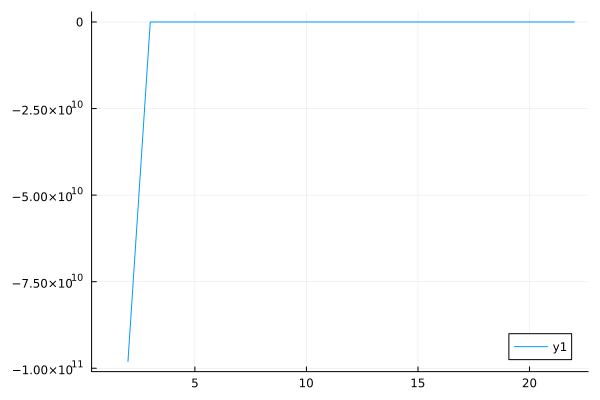

In [39]:
plot(ll)

In [6]:
# Create Guassian Emission Models
output_dim = 2
μ = [0.0, 0.0]
Σ = 0.1 * Matrix{Float64}(I, output_dim, output_dim)
emission_1 = GaussianEmission(output_dim, μ, Σ)

μ = [2.0, 1.0]
Σ = 0.1 * Matrix{Float64}(I, output_dim, output_dim)
emission_2 = GaussianEmission(output_dim, μ, Σ)

# Create GaussianHMM
true_model = GaussianHMM(K=2, output_dim=2)
true_model.B[1] = emission_1
true_model.B[2] = emission_2
true_model.A = [0.9 0.1; 0.8 0.2]

# Sample from the model
n=20000
true_labels, data = StateSpaceDynamics.sample(true_model, n=n)

# Fit a new gaussian hmm to the data
test_model = GaussianHMM(K=2, output_dim=2)
ll = SSD.fit!(test_model, data)

23-element Vector{Float64}:
    -Inf
 -44430.14530702644
 -28608.92563745928
 -28608.909547786763
 -28608.743094886533
 -28607.017278166368
 -28589.143857908537
 -28410.23662999389
 -27030.73220545987
 -22168.657106515708
      ⋮
 -18962.486014551727
 -18756.528717794303
 -18412.609784424956
 -17905.023510139938
 -17627.625569040913
 -17617.658141737444
 -17617.6475796683
 -17617.64757184082
 -17617.647571826597

In [8]:
println(true_model.A)
println(test_model.A)

[0.9 0.1; 0.8 0.2]
[0.19725532294954548 0.8027446770504554; 0.102355836161429 0.8976441638385683]
